# US Restaurant data analysis

## Import/Load the Data

In [2]:
import pandas as pd

df = pd.read_csv('restaurant_data_analysis.csv')

## Checking the structure, contents, and statistics of the data

In [3]:
# the number of rows and columns in the DataFrame
df.shape

(10000, 8)

In [4]:
# names of all columns in the DataFrame
df.columns

Index(['name', 'categories', 'city', 'state', 'address', 'postalCode',
       'latitude', 'longitude'],
      dtype='object')

In [5]:
# summary of the DataFrame, non-null values, data types of columns, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        10000 non-null  object 
 1   categories  10000 non-null  object 
 2   city        10000 non-null  object 
 3   state       10000 non-null  object 
 4   address     10000 non-null  object 
 5   postalCode  10000 non-null  object 
 6   latitude    10000 non-null  float64
 7   longitude   10000 non-null  float64
dtypes: float64(2), object(6)
memory usage: 625.1+ KB


In [6]:
# the first few rows
df.head()

,name,categories,city,state,address,postalCode,latitude,longitude
0,Carl's Jr.,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Greeley,CO,2555 11th Avenue,80631,40.39629,-104.69699
1,Del Taco,"Restaurant,Mexican Restaurants,Fast Food Resta...",Grand Junction,CO,2513 Highway 6 And 50,81505,39.08135,-108.58689
2,Which Wich,"Sandwich Shops,Fast Food Restaurants,Restauran...",Grand Junction,CO,1125 Patterson Road,81506,39.09148,-108.55411
3,Chipotle Mexican Grill,"Fast Food Restaurants,Mexican Restaurants,Rest...",Aurora,CO,3455 N Salida Court,80011,39.76369,-104.77671
4,Taco Bell,"Fast Food Restaurants,Mexican Restaurants,Rest...",Denver,CO,5225 E Colfax Avenue,80220,39.74044,-104.92636


In [7]:
# the last few rows
df.tail()

,name,categories,city,state,address,postalCode,latitude,longitude
9995,Church's Chicken Of Birmingham,"American Restaurants,Caterers,Soul Food Restau...",Bessemer,AL,1803 Carolina Ave,35020,33.399574,-86.951050
9996,Luxury Box,"Mexican Restaurants,Caterers,Delicatessens,Iri...",Raleigh,NC,8511 Cantilever Way Ste 105,27613-6996,35.884500,-78.737541
9997,McDonald's,"Carry-out food,Hot dog restaurants,Fast Food R...",Plover,WI,2601 Plover Rd,54467,44.453180,-89.543170
9998,Pizza Hut,"Carry-out food,Caterers,Restaurant delivery se...",Hendersonville,TN,170 E Main St,37075,36.308262,-86.607339
9999,Burger King,"Fast Food Restaurant,Restaurants",Durham,NC,3400 Westgate Drive,27707-2696,35.965869,-78.963366


In [8]:
# descriptive statistics of numerical columns (count, mean, std, min, max, etc.)
df.describe(include='all')

,name,categories,city,state,address,postalCode,latitude,longitude
count,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000
unique,1545,5670,2810,47,9954,5310,NaN,NaN
top,McDonald's,"Fast Food Restaurants,Hamburgers and Hot Dogs,...",Columbus,OH,2005 Kalia Rd,37040,NaN,NaN
freq,765,182,105,922,4,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,37.298215,-93.284547
std,NaN,NaN,NaN,NaN,NaN,NaN,5.566995,16.421424
min,NaN,NaN,NaN,NaN,NaN,NaN,19.639560,-159.464310
25%,NaN,NaN,NaN,NaN,NaN,NaN,33.850652,-98.342758
50%,NaN,NaN,NaN,NaN,NaN,NaN,37.490189,-86.677452
75%,NaN,NaN,NaN,NaN,NaN,NaN,40.808905,-81.803061


## Cleaning the data

In [9]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Handle missing values
# Check for missing values in each column
df.isnull().sum()

name          0
categories    0
city          0
state         0
address       0
postalCode    0
latitude      0
longitude     0
dtype: int64

In [11]:
# If latitude/longitude is missing, we may choose to drop those rows for geospatial analysis
df.dropna(subset=['latitude', 'longitude'], inplace=True)

In [12]:
# Standardize text data (converting to lowercase, stripping extra spaces)
df['name'] = df['name'].str.lower().str.strip()
df['categories'] = df['categories'].str.lower().str.strip()
df['city'] = df['city'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()

In [13]:
# Handle outliers in latitude and longitude
# Normally, US latitudes range from about 24 to 49, and longitudes range from -125 to -66.
df = df[(df['latitude'] >= 24) & (df['latitude'] <= 49)]
df = df[(df['longitude'] >= -125) & (df['longitude'] <= -66)]

# Statistical analysis

In [14]:
# Summary statistics
df.describe()

,latitude,longitude
count,9845.000000,9845.000000
mean,37.292630,-92.333277
std,5.026740,14.666178
min,24.571790,-124.400100
25%,33.902873,-97.477110
50%,37.529301,-86.519800
75%,40.785030,-81.754867
max,48.963978,-71.082180


In [15]:
# Split categories to analyze the most common food categories
from collections import Counter
category_list = df['categories'].str.split(', ')
all_categories = [item for sublist in category_list.dropna() for item in sublist]
category_count = Counter(all_categories)
category_count.most_common(10)

[('fast food restaurants,hamburgers and hot dogs,restaurants', 180),
 ('fast food', 146),
 ('ice cream parlors,breakfast,fast food,coffeehouses,salads,hamburgers,restaurants,sandwich shops',
  138),
 ('fast food restaurant', 117),
 ('fast food,chicken,restaurants', 93),
 ('american restaurant', 92),
 ('fast food restaurants,restaurants,sandwich shops,take out restaurants', 85),
 ('restaurant,mexican,breakfast,vegetarian,fast food,restaurants', 81),
 ('fast food restaurants,take out restaurants,hamburgers and hot dogs,restaurants',
  75),
 ('burrito place', 72)]

## Geographical Distribution Analysis

In [16]:
# !pip install folium
import folium
# a map centered around the US
map_us = folium.Map(location=[39.50, -98.35], zoom_start=4)
# Add restaurant locations
# for idx, row in df.iterrows():
#     folium.Marker([row['latitude'], row['longitude']], popup=row['name']).add_to(map_us)

# map_us

## Data visualization

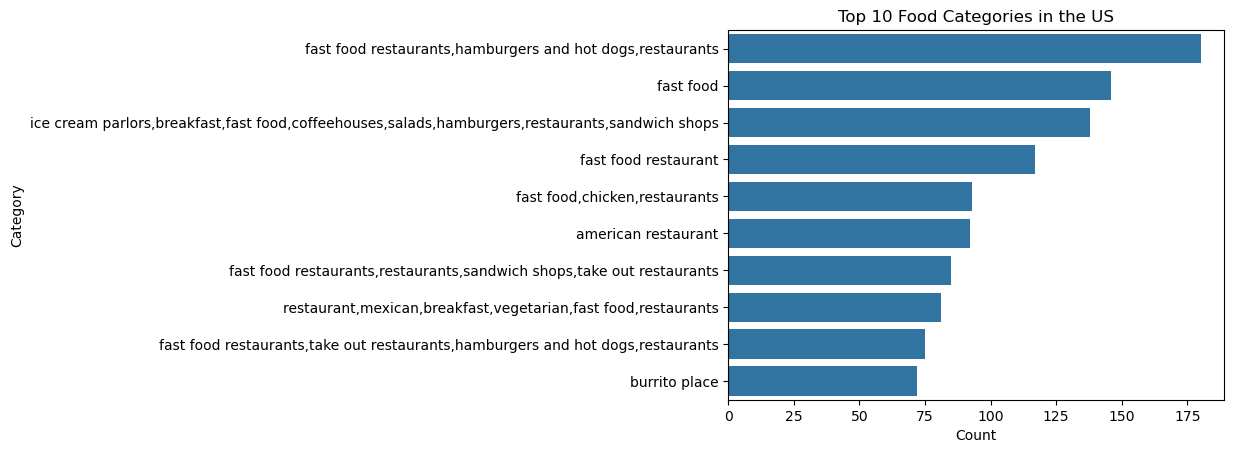

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart for top food categories
top_categories = pd.DataFrame(category_count.most_common(10), columns=['Category', 'Count'])
sns.barplot(x='Count', y='Category', data=top_categories)
plt.title('Top 10 Food Categories in the US')
plt.show()

# Restaurants by state

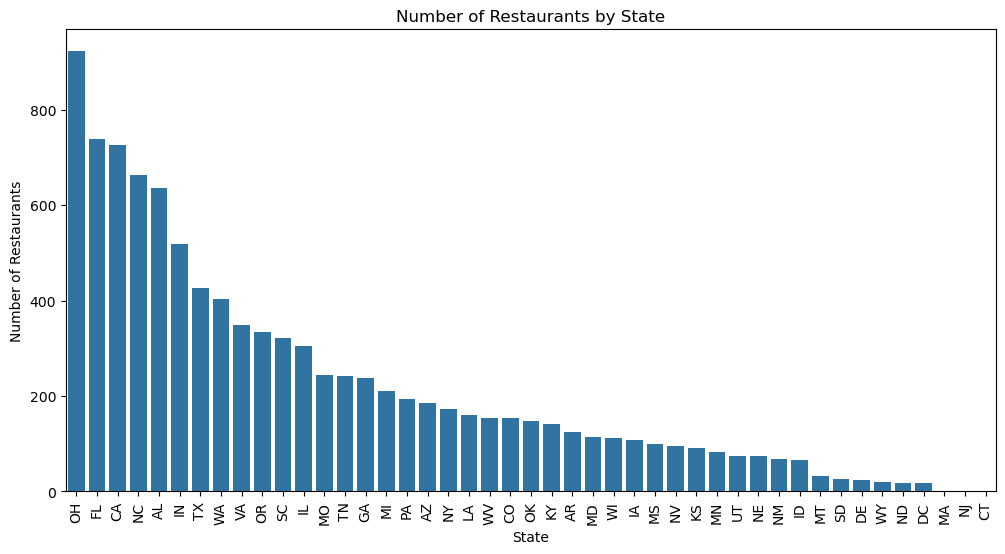

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'state' and count the number of restaurants
restaurants_by_state = df['state'].value_counts().reset_index()
restaurants_by_state.columns = ['State', 'Restaurant Count']

# Sort the states by the number of restaurants for better visualization
restaurants_by_state = restaurants_by_state.sort_values(by='Restaurant Count', ascending=False)

# Plot a bar graph of the number of restaurants per state
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Restaurant Count', data=restaurants_by_state)
plt.title('Number of Restaurants by State')
plt.xlabel('State')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

## Number of Restaurants by City

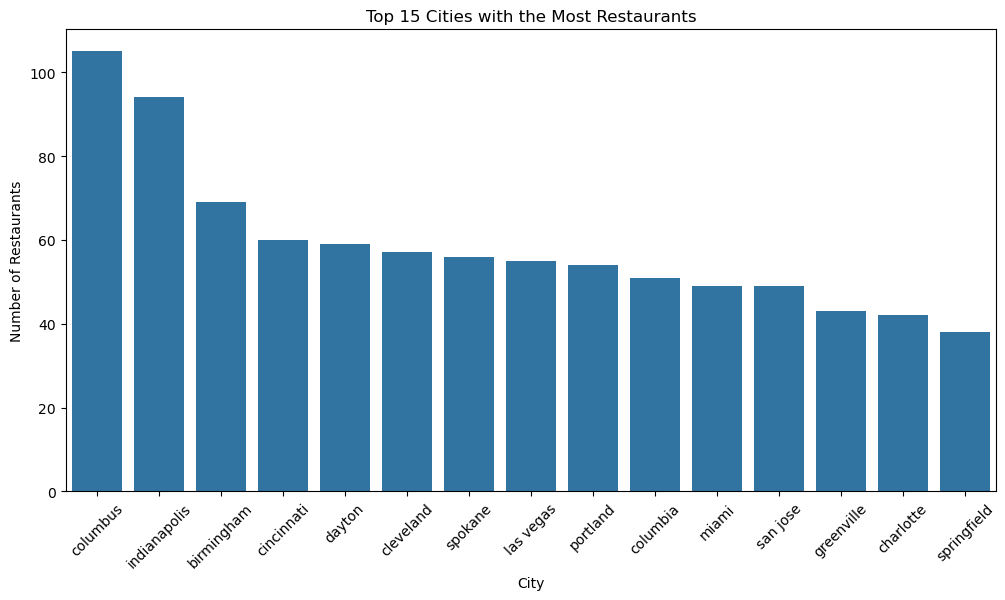

In [19]:
# Group by 'city' and count the number of restaurants
restaurants_by_city = df['city'].value_counts().reset_index()
restaurants_by_city.columns = ['City', 'Restaurant Count']

# Sort and limit the top 15 cities for better visualization
restaurants_by_city = restaurants_by_city.head(15).sort_values(by='Restaurant Count', ascending=False)

# Plot a bar graph of the number of restaurants per city
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Restaurant Count', data=restaurants_by_city)
plt.title('Top 15 Cities with the Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

## Top 10 Cities acording to number of Restaurants

In [20]:
# Adding column "Count" with constant value = 1

df['count'] = pd.Series([1 for x in range(len(df.index))])

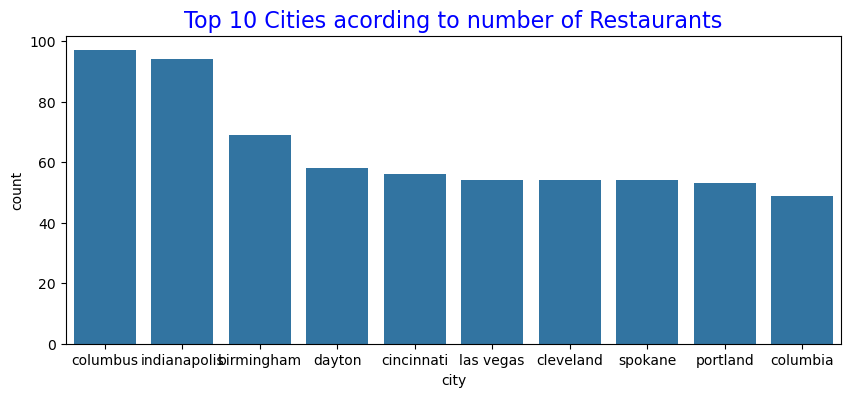

,city,count
508,columbus,97.0
1176,indianapolis,94.0
205,birmingham,69.0
608,dayton,58.0
449,cincinnati,56.0
1352,las vegas,54.0
473,cleveland,54.0
2360,spokane,54.0
2005,portland,53.0
505,columbia,49.0


In [22]:
# Top 10 Cities acording to number of Restaurants
fig, ax = plt.subplots(figsize=(10, 4))
df_top = df.groupby(['city'])[['count']].sum().reset_index()
df_top = df_top.sort_values(by=("count"), ascending=False).head(10)

sns.barplot(x=df_top["city"], y=df_top["count"])
plt.title("Top 10 Cities acording to number of Restaurants", fontsize = 16, color = 'blue')

plt.show()
df_top

## Top 10 States acording to number of Restaurants

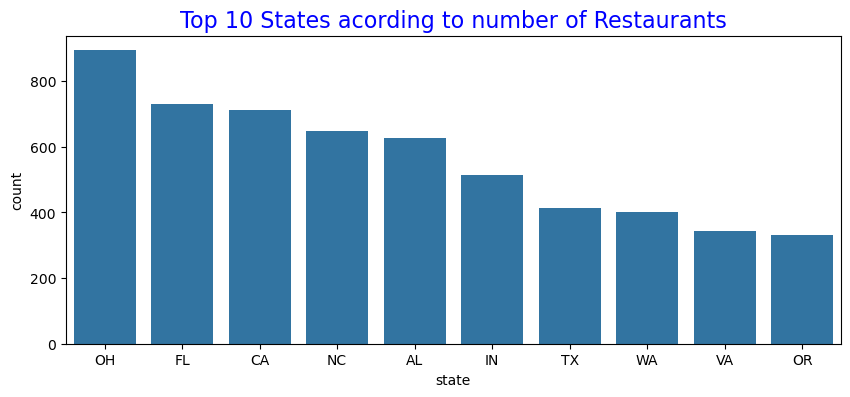

,state,count
31,OH,894.0
8,FL,731.0
3,CA,713.0
24,NC,647.0
0,AL,628.0
13,IN,515.0
38,TX,413.0
41,WA,400.0
40,VA,343.0
33,OR,330.0


In [24]:
## Top 10 States acording to number of Restaurants
fig, ax = plt.subplots(figsize=(10, 4))
df_top = df.groupby(['state'])[['count']].sum().reset_index()
df_top = df_top.sort_values(by=("count"), ascending=False).head(10)

sns.barplot(x=df_top["state"], y=df_top["count"])
plt.title("Top 10 States acording to number of Restaurants", fontsize = 16, color = 'blue')

plt.show()
df_top

## Top 10 Brands acording to number of Restaurants

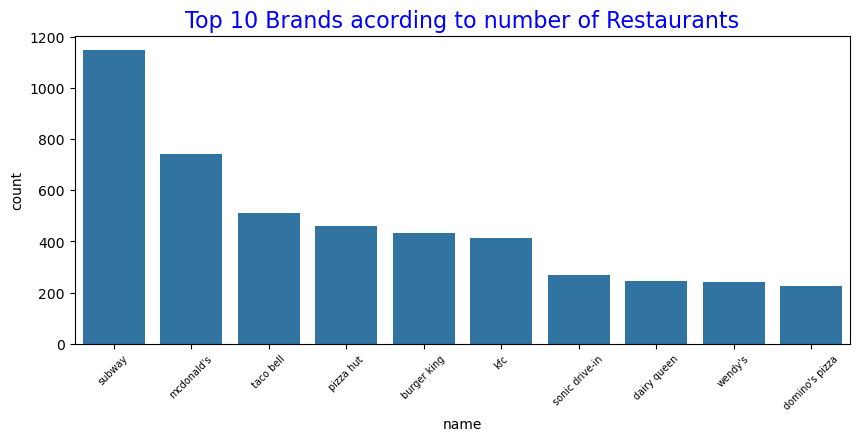

,name,count
1244,subway,1147.0
881,mcdonald's,741.0
1283,taco bell,511.0
1050,pizza hut,462.0
194,burger king,433.0
757,kfc,414.0
1219,sonic drive-in,269.0
386,dairy queen,246.0
1401,wendy's,242.0
433,domino's pizza,227.0


In [25]:
# Top 10 Brands acording to number of Restaurants
fig, ax = plt.subplots(figsize=(10, 4))
df_top = df.groupby(['name'])[['count']].sum().reset_index()
df_top = df_top.sort_values(by=("count"), ascending=False).head(10)

sns.barplot(x=df_top["name"], y=df_top["count"])
plt.xticks(rotation=45, fontsize = 7)
plt.title("Top 10 Brands acording to number of Restaurants", fontsize = 16, color = 'blue')

plt.show()
df_top